In [1]:
# Non linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

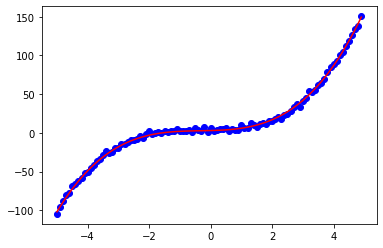

In [21]:
# general example cubic

x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x +3
y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')


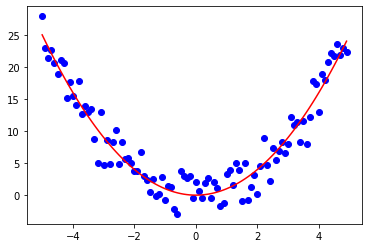

In [22]:
# general example quadratic

x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')

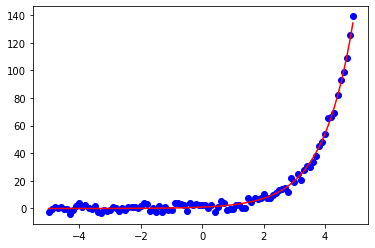

In [23]:
# general example exponential

x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)
y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')

/var/folders/dh/jzjjqv8529z6wz5qpfd7n1_r0000gn/T/ipykernel_28123/2058145138.py:4: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


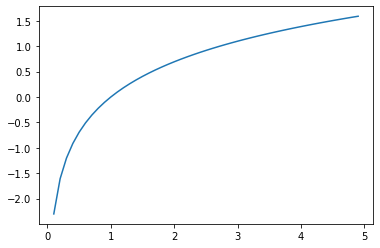

In [25]:
# general example logarithmic (note case of X)

X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)

plt.plot(X,Y)

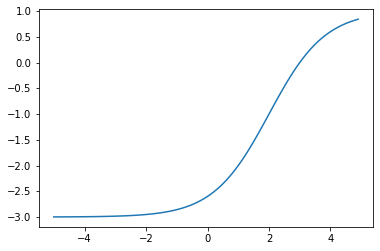

In [26]:
# general example sidmodial/logistic

X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y)

In [27]:
# Non-Linear Regression example

In [31]:
import pandas as pd

!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

df = pd.read_csv('china_gdp.csv')
df.head(10)

2022-02-07 14:37:17 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Text(0.5, 0, 'Year')

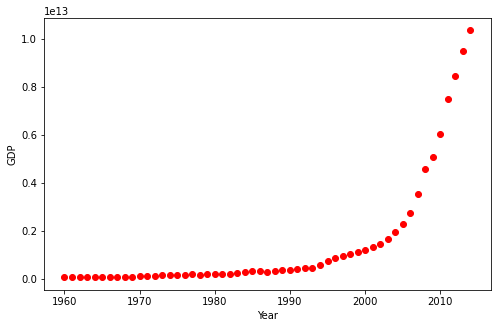

In [34]:
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

In [35]:
# appears to be a logistical model

# formula for logistic function:

# y_hat = 1 / 1+exp(-B_1(x-B_2))  

# where: B_1 control curve steepness
# # B_2 slides curve on x axis

In [36]:
# build a model

def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1+np.exp(-Beta_1*(x-Beta_2)))
    return y

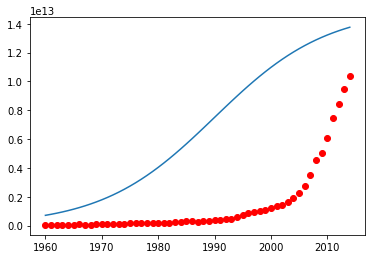

In [37]:
beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# plot initial prediction against datapoints

plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [38]:
# normalise data

xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [39]:
# use curve_fit which uses non-linear least squares to fit the sigmoid function to data. 
# Optimise values for the parameters so that the sum of the squared residuals of:
# sigmoid(xdata, *popt) - ydata is minimised

# popt are optimised parameters

In [41]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# print final parameters
print(' beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


In [42]:
# Use to plot resulting regression model:

Text(0.5, 0, 'Year')

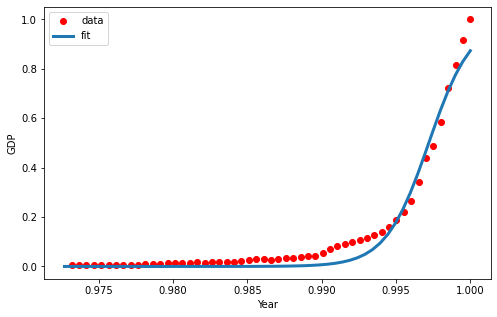

In [43]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')

In [44]:
# calculate accuracy of model

# split train & test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build model with train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluate
print('MAE: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('RSS (MSE): %.2f' % np.mean((y_hat - test_y)**2))
from sklearn.metrics import r2_score
print('R2-Score: %.2f' % r2_score(test_y, y_hat))

MAE: 0.03
RSS (MSE): 0.00
R2-Score: 0.98
